<a href="https://colab.research.google.com/github/sheraphineshovan/Imarticus_miniproject/blob/main/Covid_Normal_Pneumonia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD THE LIBRARIES AND THE DATA

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/'

In [ ]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

100% 2.05G/2.06G [00:13<00:00, 244MB/s]
100% 2.06G/2.06G [00:13<00:00, 163MB/s]


In [ ]:
!unzip chest-xray-covid19-pneumonia.zip


  inflating: Data/train/NORMAL/NORMAL(1075).jpg  
  inflating: Data/train/NORMAL/NORMAL(1076).jpg  
  inflating: Data/train/NORMAL/NORMAL(1077).jpg  
  inflating: Data/train/NORMAL/NORMAL(1078).jpg  
  inflating: Data/train/NORMAL/NORMAL(1079).jpg  
  inflating: Data/train/NORMAL/NORMAL(108).jpg  
  inflating: Data/train/NORMAL/NORMAL(1080).jpg  
  inflating: Data/train/NORMAL/NORMAL(1081).jpg  
  inflating: Data/train/NORMAL/NORMAL(1082).jpg  
  inflating: Data/train/NORMAL/NORMAL(1083).jpg  
  inflating: Data/train/NORMAL/NORMAL(1084).jpg  
  inflating: Data/train/NORMAL/NORMAL(1085).jpg  
  inflating: Data/train/NORMAL/NORMAL(1086).jpg  
  inflating: Data/train/NORMAL/NORMAL(1087).jpg  
  inflating: Data/train/NORMAL/NORMAL(1088).jpg  
  inflating: Data/train/NORMAL/NORMAL(1089).jpg  
  inflating: Data/train/NORMAL/NORMAL(109).jpg  
  inflating: Data/train/NORMAL/NORMAL(1090).jpg  
  inflating: Data/train/NORMAL/NORMAL(1091).jpg  
  inflating: Data/train/NORMAL/NORMAL(1092).jpg  
 

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# COMPILE THE MODEL

In [ ]:
img_width, img_height = 200,200
train_data_dir = r"/content/Data/train"
validation_data_dir=r"/content/Data/test"
nb_train_samples =100
nb_validation_samples =100
epochs =30
batch_size= 10

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [ ]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator (rescale=1. /255)

In [ ]:
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='categorical',classes=['COVID19','NORMAL','PNEUMONIA'])

Found 5144 images belonging to 3 classes.


In [ ]:
validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='categorical')

Found 1288 images belonging to 3 classes.


In [ ]:
#DECLARE THE MODEL
model=Sequential()

#BLOCK-1
model.add(Conv2D(64,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK-2
model.add(Conv2D(128,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#BLOCK-3
model.add(Conv2D(256,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#bLOACK-4
model.add(Conv2D(512,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#CLASSIFICATION
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))


#FINAL OUTPUT LAYER
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 256)      0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
training = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples
)

<ipython-input-29-1dc2f7d4d769>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 31s 315ms/step - loss: 0.8285 - accuracy: 0.6790 - val_loss: 0.7932 - val_accuracy: 0.6730
Epoch 2/30
100/100 [==============================] - 32s 319ms/step - loss: 0.8878 - accuracy: 0.6147 - val_loss: 0.8813 - val_accuracy: 0.6720
Epoch 3/30
100/100 [==============================] - 41s 413ms/step - loss: 0.7318 - accuracy: 0.6990 - val_loss: 0.4265 - val_accuracy: 0.8360
Epoch 4/30
100/100 [==============================] - 41s 416ms/step - loss: 0.5147 - accuracy: 0.8150 - val_loss: 0.3055 - val_accuracy: 0.8890
Epoch 5/30
100/100 [==============================] - 41s 411ms/step - loss: 0.3960 - accuracy: 0.8580 - val_loss: 0.3466 - val_accuracy: 0.8910
Epoch 6/30
100/100 [==============================] - 40s 403ms/step - loss: 0.4356 - accuracy: 0.8390 - val_loss: 0.2857 - val_accuracy: 0.8950
Epoch 7/30
100/100 [==============================] - 40s 399ms/step - loss: 0.3991 - accuracy: 0.8460 - val_loss: 0.3529 - val_ac

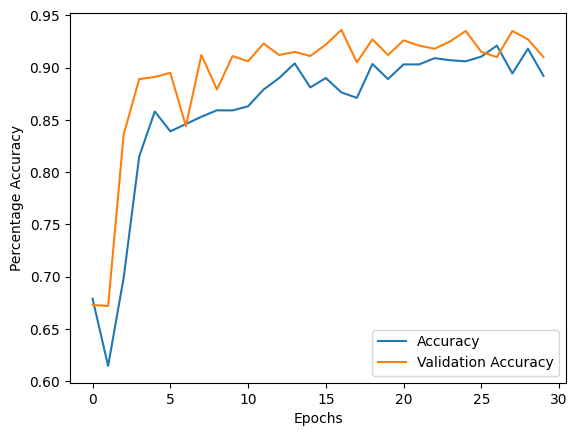

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Percentage Accuracy')
plt.show()

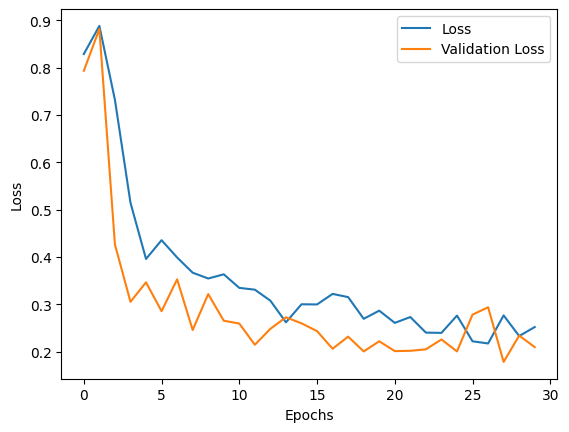

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
def pred(a):
  img_pred = image.load_img(a,target_size=(200,200))
  img_pred=image.img_to_array(img_pred)
  img_pred=np.expand_dims(img_pred, axis=0)
  result=model.predict(img_pred)

  print(result)

  if result[0][0]==1:
    prediction ="COVID-19"
  elif result[0][1]==1:
    prediction ="NORMAL"
  else:
    prediction="PNEUMONIA"

  img=mpimg.imread(a)
  imgplot = plt.imshow(img)
  plt.show()

  print('Prediction: ',prediction)

In [ ]:
pred("/content/Data/test/COVID19/COVID19(467).jpg")

NameError: ignored

# VGP16 MODEL

In [ ]:
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model
from keras import applications

In [ ]:
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

In [ ]:
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

In [ ]:
from keras.layers.pooling.global_max_pooling2d import GlobalMaxPooling2D
x=MaxPooling2D(pool_size=(2,2))(pre_trained_model.output)
x=Flatten()(x)


x=Dense(512,activation='relu')(x)
x=Dense(256,activation='relu')(x)
x=Dense(64,activation='relu')(x)

x=Dense(3,activation='softmax')(x)

model1=Model(pre_trained_model.input,x)

In [ ]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [ ]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_1=model1.fit_generator(train_generator,steps_per_epoch=100,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)

<ipython-input-41-dd3b8ed37809>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_1=model1.fit_generator(train_generator,steps_per_epoch=100,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)


Epoch 1/30
100/100 [==============================] - 40s 353ms/step - loss: 0.7578 - accuracy: 0.7032 - val_loss: 0.3430 - val_accuracy: 0.8740
Epoch 2/30
100/100 [==============================] - 42s 419ms/step - loss: 0.3960 - accuracy: 0.8571 - val_loss: 0.3395 - val_accuracy: 0.8670
Epoch 3/30
100/100 [==============================] - 41s 412ms/step - loss: 0.3729 - accuracy: 0.8640 - val_loss: 0.2015 - val_accuracy: 0.9260
Epoch 4/30
100/100 [==============================] - 33s 325ms/step - loss: 0.3080 - accuracy: 0.8920 - val_loss: 0.1797 - val_accuracy: 0.9390
Epoch 5/30
100/100 [==============================] - 41s 414ms/step - loss: 0.2357 - accuracy: 0.9140 - val_loss: 0.1628 - val_accuracy: 0.9490
Epoch 6/30
100/100 [==============================] - 33s 327ms/step - loss: 0.2446 - accuracy: 0.9044 - val_loss: 0.3202 - val_accuracy: 0.8880
Epoch 7/30
100/100 [==============================] - 40s 405ms/step - loss: 0.2528 - accuracy: 0.9135 - val_loss: 0.1589 - val_ac